Q: How much more likely is certain preexisting conditions/symptoms to be related to high mortality? 

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree

In [2]:
df = pd.read_csv('../Data/cleaned_data.csv')

In [3]:
df;

In [4]:
# list for columns 
my_list = df.columns.values.tolist()
my_list;

In [5]:
# grabbing relevant column names that contribute to covid risk factors 
column_names = ['Mean Age','% Male','Smoking history', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
                'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)',
                'Fatigue', 'Upper air-way congestion', 'Diarrhoea', 'Nausea or Vomiting', 'Loss of Appetite/Anorexia',
                'Sore Throat/Stuffy Nose', 'Chills', 'Chest Pain', 'Loss of smell/taste', 'Disease Severity Asymptomatic',
                'Mortality_bin']

new_df = pd.DataFrame(df,columns=column_names)
new_df;

In [6]:
# assigning variables for Classifier Modeling
data = new_df.drop("Mortality_bin", axis=1)
feature_names = data.columns
target=new_df['Mortality_bin']
target_names=['low_risk','high_risk']

In [7]:
# split test/train data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [8]:
# Decision tree classifier returns 100% 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

1.0

In [9]:
# Decision random forest classifier also returns 100% 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [10]:
# looking at feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.18604627613189922, 'Diabetes'),
 (0.07644809158305058, 'Chronic obstructive lung (COPD)'),
 (0.07398458710374614, 'Mean Age'),
 (0.0735798804823746, 'Hypertension'),
 (0.07099221758307069, 'Chronic kidney/renal disease'),
 (0.06101449014948093, 'Cardiovascular Disease (incl. CAD)'),
 (0.05410027532346016, 'Shortness of Breath (dyspnoea)'),
 (0.047544705727195116, 'Cancer (Any)'),
 (0.04352328874416994, '% Male'),
 (0.037586437615932694, 'Fever (temperature ≥37·3°C)'),
 (0.03079054699992328, 'Diarrhoea'),
 (0.03006681455487067, 'Cerebrovascular Disease'),
 (0.029076872077649404, 'Cough'),
 (0.027917956562611916, 'Respiratory rate > 24 breaths per min'),
 (0.026614877838977164, 'Fatigue'),
 (0.021115892075660204, 'Myalgia (Muscle Pain)'),
 (0.016149466846433123, 'Nausea or Vomiting'),
 (0.013695995346292721, 'Other'),
 (0.013671071164252606, 'Smoking history'),
 (0.013381623810998165, 'Headache'),
 (0.01188194192450603, 'Liver Disease (any)'),
 (0.011598723597866182, 'Sore Throat/Stu

In [11]:
# Splitting up Underlying illness and Symptoms 
# column_names = ['Mean Age','% Male','Smoking history', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
#                 'Chronic obstructive lung (COPD)', 'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
#                 'Chronic kidney/renal disease', 'Other','Mortality_bin']

# risk_df = pd.DataFrame(new_df,columns=column_names)
# data = risk_df.drop("Mortality_bin", axis=1)
# feature_names = data.columns
# target=risk_df['Mortality_bin']
# target_names=['low_risk','high_risk']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)  
# clf.score(X_test, y_test)

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=500)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

# sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# Is comparable to high risk preexisting conditions on cdc website
# DM, age, HTN, CVD, COPD, Cancer/immunocompromised are main contributors to mortality 

In [12]:
# column_names = ['Mean Age','% Male','Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
#                 'Cough', 'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)',
#                 'Fatigue', 'Upper air-way congestion', 'Diarrhoea', 'Nausea or Vomiting', 'Loss of Appetite/Anorexia',
#                 'Sore Throat/Stuffy Nose', 'Chills', 'Chest Pain', 'Loss of smell/taste', 'Disease Severity Asymptomatic','Mortality_bin']

# symptoms_df = pd.DataFrame(new_df,columns=column_names)

# data = symptoms_df.drop("Mortality_bin", axis=1)
# feature_names = data.columns
# target=symptoms_df['Mortality_bin']
# target_names=['low_risk','high_risk']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)  
# clf.score(X_test, y_test)

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=500)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

# sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# #Age, SOB, Fever, cough, diarrhea, tachypnea are main contributors to mortality rate 

In [13]:
# Grabbing top 6 underlying illness and symptoms and age/gender as factors based on feature importance
column_names = ['Mean Age', '% Male','Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 
                'Chronic kidney/renal disease', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)','Diarrhoea', 'Fatigue',
                'Mortality_bin']
factors = pd.DataFrame(new_df,columns=column_names)
factors;


In [14]:
# assigning variables 
X = factors.drop('Mortality_bin', axis=1)
y = factors['Mortality_bin']

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.80, random_state=1)


In [15]:
# importing logistic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=300)
classifier


LogisticRegression(max_iter=300)

In [16]:
# fit training data 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [17]:
# classifier score 
print(f"Training Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.875


In [18]:
# using classifier for predictions
predictions = classifier.predict(X_test)
result=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(25)
result;

In [19]:
# printing f-score in classification report 
from sklearn.metrics import classification_report
print(classification_report (y_test, predictions, target_names = ['low risk','high risk']))

              precision    recall  f1-score   support

    low risk       0.92      0.93      0.92       188
   high risk       0.67      0.66      0.67        44

    accuracy                           0.88       232
   macro avg       0.80      0.79      0.79       232
weighted avg       0.87      0.88      0.87       232



In [20]:
# printing classification report as csv file 
report = classification_report (y_test, predictions, target_names = ['low risk','high risk'],output_dict=True)
class_report=pd.DataFrame(report).transpose()
class_report.to_csv('../static/pltImages/classificationReport.csv')

In [21]:
# from sklearn import metrics
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions, labels = [0,1])
matrix

array([[174,  14],
       [ 15,  29]])

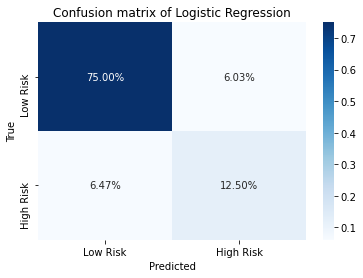

In [23]:
# confusion matrix with % break down 
import seaborn as sns
ax = plt.subplot()
# labels = ['Low Risk','High Risk']
categories = ['lowrisk',' highrisk']
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.set_title('Confusion matrix of Logistic Regression')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(['Low Risk','High Risk']); ax.yaxis.set_ticklabels(['Low Risk','High Risk']);

plt.savefig('../static/pltImages/confusionMatrix.png')


In [ ]:
# confusion matrix with values 
labels = ['Low Risk','High Risk']
data = confusion_matrix(y_test,predictions)
data_df = pd.DataFrame(data, columns=labels, index = labels)
data_df.index.name = 'Actual'
data_df.columns.name = 'Predicted'
# plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(data_df, cmap="Blues", annot=True, fmt='g',annot_kws={"size": 14})# font size

In [ ]:
list(factors)

In [ ]:
# testing new patient data 
new_patient = [12,1,1,0,1,0,0,0,1,1,0,1,0,0]


In [ ]:
data = np.array([new_patient]) 
predictions = classifier.predict(data)
predictions

In [ ]:
# saving model to file 
import pickle
filename='../LogisticRegression/predictorRisk2.sav'
pickle.dump(classifier, open(filename,'wb'))